In [42]:
import pandas as pd
import numpy as np

In [43]:

from google.colab import files
uploaded = files.upload()

Saving Housing_Data_Python.csv to Housing_Data_Python (1).csv


In [125]:
df = pd.read_csv("Housing_Data_Python.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [126]:
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].map({'yes': 5, 'no': 0, 'furnished':5, 'semi-furnished':3, 'unfurnished':0})
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,5,0,0,0,5,2,5,5
1,12250000,8960,4,4,4,5,0,0,0,5,3,0,5
2,12250000,9960,3,2,2,5,0,5,0,0,2,5,3
3,12215000,7500,4,2,2,5,0,5,0,5,3,5,5
4,11410000,7420,4,1,2,5,5,5,0,5,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,5,0,5,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,3
542,1750000,3620,2,1,1,5,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,5


In [390]:
y = df.price
y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [389]:
x = df.drop(['price'], axis=1)
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,5,0,0,0,5,2,5,5
1,8960,4,4,4,5,0,0,0,5,3,0,5
2,9960,3,2,2,5,0,5,0,0,2,5,3
3,7500,4,2,2,5,0,5,0,5,3,5,5
4,7420,4,1,2,5,5,5,0,5,2,0,5


In [272]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error

In [383]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [384]:
model = linear_model.LinearRegression()

In [385]:
model.fit(x_train, y_train)

LinearRegression()

In [386]:
y_pred = model.predict(x_test)

In [387]:
r2 = r2_score(y_test, y_pred)
print(f"Model's R^2 Accuracy: {r2*100:.3f}")

Model's R^2 Accuracy: 76.016


In [388]:
print( "Model's MSE: ",np.sqrt( mean_squared_error( y_test, y_pred)))
print( "Model's MAE: ",mean_absolute_error(y_test, y_pred))
print( "Model's MAPE: ",mean_absolute_percentage_error(y_test, y_pred))
print("Model's MSLE:",mean_squared_log_error(y_test, y_pred))

Model's MSE:  955860.1089663985
Model's MAE:  724480.974654324
Model's MAPE:  0.1699963313481704
Model's MSLE: 0.04182376966368276


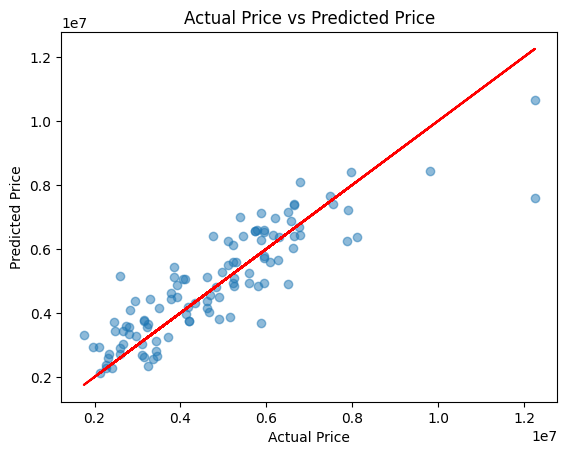

In [411]:
import matplotlib.pyplot as plt
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.plot(y_test, y_test, c='red')
plt.show()